In [1]:
import numpy as np
M = np.array([1.7e-3, 6.75e-4, 1.58e-3, 5.8e-4])

M2 = np.array([1.27e-3, 4.99e-4, 1.58e-3, 5.57e-4])
M_t = np.array([1e-3, 4e-4,1e-3, 4e-4])
r = np.log10(M_t)/np.log10(M2)
r

array([1.0358414 , 1.02908646, 1.07091495, 1.04418832])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simple_slider import kanagawa_profile
from simple_slider import get_disk_height
import astropy.constants as c 

au    = c.au.cgs.value

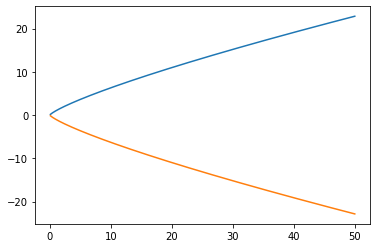

In [38]:
r = np.linspace(0.1, 50, 300)
q = 1.4
e = (1-q)/2
y = r**(e)
fig, ax = plt.subplots()
ax = plt.plot(r, y*r)
ax = plt.plot(r,-y*r)

In [2]:
def fa(R_p, aspect_ratio, mass_rel, alpha):
    K_prime   = (mass_rel)**2 * (aspect_ratio)**-3 * 1 / (alpha)
    K         = K_prime / ((aspect_ratio)**2)
    sig_min_0 = 1 / (1 + 0.04 * K)
    R1        = (sig_min_0 / 4 + 0.08) * K_prime**(1 / 4) * R_p
    R2        = 0.33 * K_prime**(1 / 4) * R_p
    return R1,R2

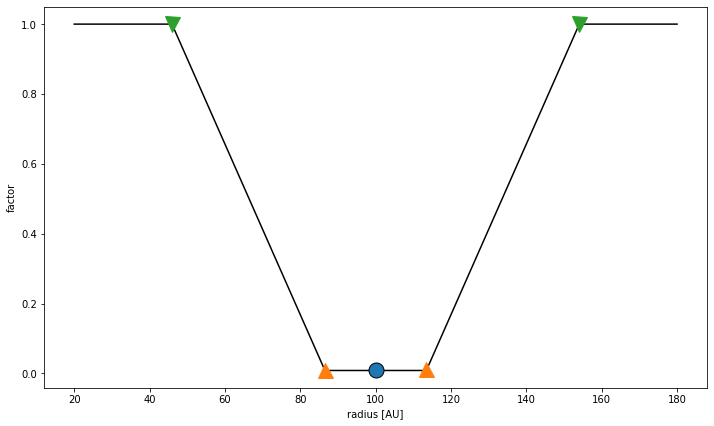

In [12]:
delt = 80
r = np.linspace(100-delt,100+delt,500)*au
sig = np.ones_like(r)
Rp = 100*au
al = 1e-2
mass = 3e-3
ar = 1/20

kngw = kanagawa_profile(r/(Rp), al, ar, mass)['fact']
R1, R2 = fa(Rp,ar,mass,al)
nR1, nR2 = np.array([Rp+R1, Rp-R1]), np.array([Rp+R2, Rp-R2])

f, ax = plt.subplots(figsize=(10,6))
ax.plot(r/au,kngw,'k')
ax.plot(Rp/au,kngw[np.searchsorted(r,Rp)],marker='o', linestyle=None, markersize=15, markeredgecolor='k')
ax.plot(nR1/au,kngw[np.searchsorted(r,nR1)], marker='^', linestyle='None', markersize=15)
ax.plot(nR2/au,kngw[np.searchsorted(r,nR2)], marker='v', linestyle='None', markersize=15)
ax.set_xlabel('radius [AU]')
ax.set_ylabel('factor')
plt.tight_layout(pad=1);
#plt.savefig('kanagawa_example.png',dpi=150)

In [3]:
import astropy.constants as c
import numpy as np


au    = c.au.cgs.value
G     = c.G.cgs.value
k_b   = c.k_B.cgs.value
m_p   = c.m_p.cgs.value
M_sun = c.M_sun.cgs.value
mu    = 2.3

In [4]:
def get_disk_height(R):
    """
    calculate disk height profile from temperature model
    """
    M_star = 2.3*M_sun
    q      = 0.8
    T      = 20 * (R / (100 * au))**-0.8
    #T      = 40.12 * (R / (100 * au))**-0.5
    cs     = np.sqrt(k_b * T / (mu * m_p))
    om     = np.sqrt(G * M_star / R**3)
    h      = cs / om
    return h

In [5]:
'{:.3g}'.format(1/(get_disk_height(100*au)/100/au))

'16.9'

In [19]:
# values for a table
# a are h/r and alpha, b are the values labeled in l

a = np.array([[get_disk_height(100*au)/100/au,
               get_disk_height(100*au)/100/au], 
              [1e-2,
               1e-3]])
om = np.sqrt(G*2.3*M_sun/((100*au)**3))
mass = 1e-3
# a[0] are h/r
# a[1] are alphas
b = np.array([np.sqrt(27/8 *np.pi*(a[0]**(5/2)*a[1])), 
              3*(a[0])**3,
              27/8 * np.pi / om * mass**-2 * a[0]**5,
              1/(a[1]*om)])
l = [r'$q_\text{crit1}$', r'$q_\text{crit2}$',r'$t_\text{open} $',r'$t_\text{close}$']
#b = '{:.3f}'.format(b[:,0])
1/a[0]

array([16.86021857, 16.86021857])

In [20]:
import matplotlib.ticker as mticker

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.3e' % x))
fmt = mticker.FuncFormatter(g)

In [21]:
for i in range(4):
    print(l[i],'&','{}'.format(fmt(b[i,0])),'&','{}'.format(fmt(b[i,1]))+r'\\')

$q_\text{crit1}$ & $9.531{\times}10^{-3}$ & $3.014{\times}10^{-3}$\\
$q_\text{crit2}$ & $6.259{\times}10^{-4}$ & $6.259{\times}10^{-4}$\\
$t_\text{open} $ & $2.577{\times}10^{10}$ & $2.577{\times}10^{10}$\\
$t_\text{close}$ & $3.312{\times}10^{11}$ & $3.312{\times}10^{12}$\\


In [ ]:
a = np.array([1, 5, 2 , 7, 5, 1])
b = np.array([2])
c = (a[:,None] - b[None, :])<b[None,:]
m = c.all(1)
a[m]

In [ ]:
f=0.1
x = np.logspace(-2.5, 1, 500)
R=x
x

In [ ]:
M_star = M_sun
q      = - 2 * f + 1 
T      = 20 * (R / (100 * au))**-q
cs     = np.sqrt(k_b * T / (mu * m_p))
om     = np.sqrt(G * M_star / R**3)
h      = cs / om

In [ ]:
#converting flaring index to q
#q = - np.log((R*f*om)**2 * mu *m_p/(20 * k_b))/np.log(R/(100*au))
# that was wrong
q = - 2 * f + 1 
q

NameError: name 'x' is not defined

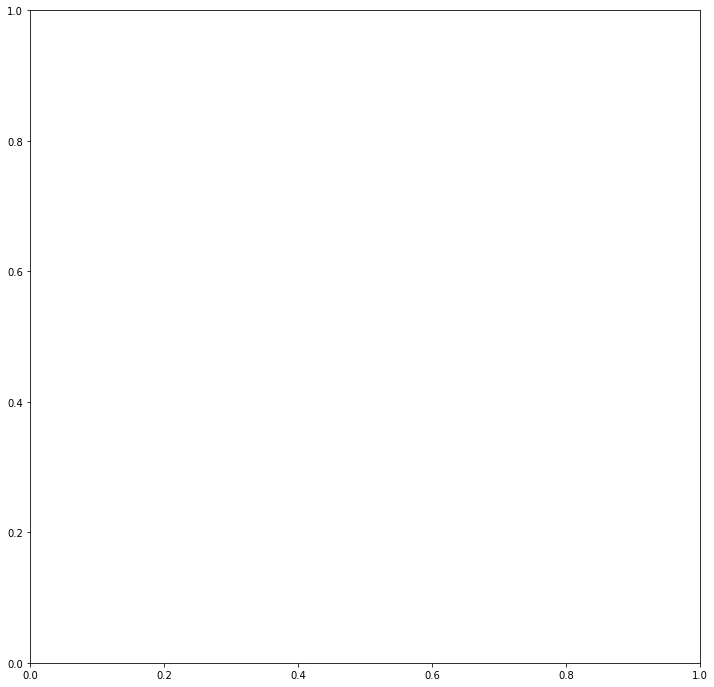

In [4]:
import matplotlib.pyplot as plt
from simple_slider import get_disk_height
a=0
fig, ax = plt.subplots(figsize=(12,12))
for q in [0.5, 1.5, 5.0]:
    ax.loglog(x,(x*(q**2))**-q /10)
    a += (x*(q**2))**-q /10
ax.loglog(x,a);


In [1]:
import numpy as np
a = np.array([1,2,3,4])
mask = [True, False, False, True]
a[mask] = 7
a

array([7, 2, 3, 7])